In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
df = pd.read_csv("students_grades.csv")
print(df.head())
print(df.describe())
print(df['Grade'].value_counts())

    Student  Korean  English  Mathematics  Social  Science  Average Grade
0  Student1      87      100           58      27       53     65.0     D
1  Student2      72       98           71      53       74     73.6     C
2  Student3      91       76           55      65       75     72.4     C
3  Student4     100       59           67     100       87     82.6     B
4  Student5      69       92           28      89       41     63.8     D
            Korean      English  Mathematics       Social     Science  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     73.313000    74.430000    73.126000    72.360000    72.18100   
std      20.881549    21.315615    21.211838    22.274662    22.20034   
min       0.000000     1.000000     0.000000     2.000000     0.00000   
25%      59.000000    60.000000    59.000000    57.000000    58.00000   
50%      76.000000    77.000000    75.000000    75.000000    75.00000   
75%      91.000000    93.000000    91.250000 

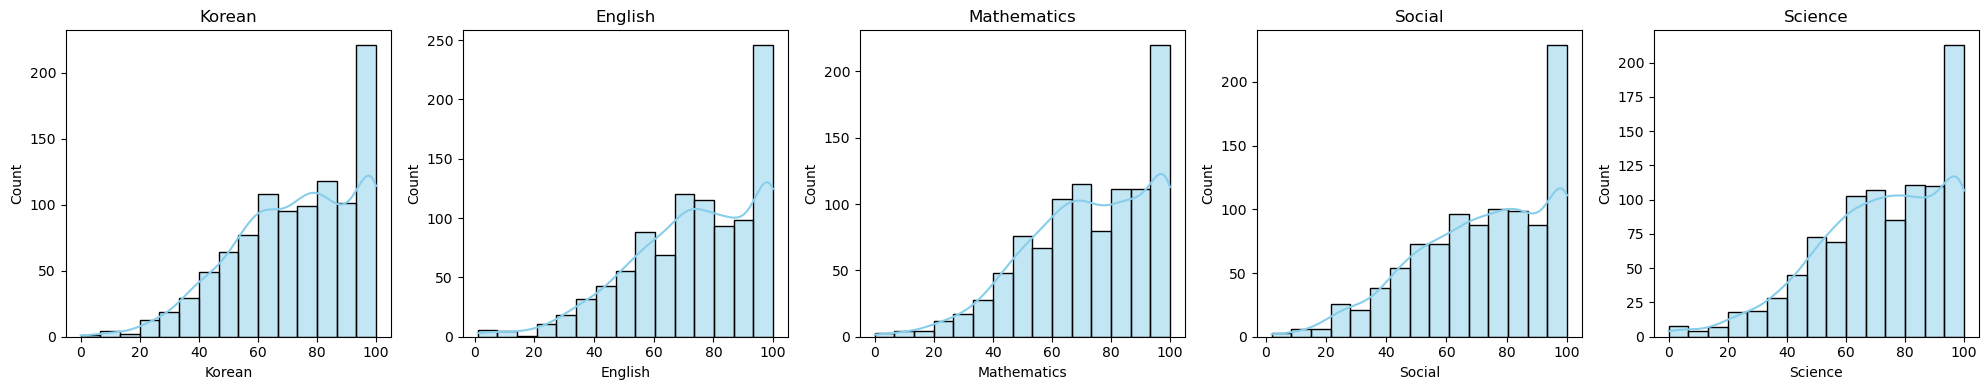

In [3]:
# 과목별 점수 분포 (subplot)
fig, axes = plt.subplots(1, 5, figsize=(20,4))
for i, col in enumerate(["Korean","English","Mathematics","Social","Science"]):
    sns.histplot(df[col], bins=15, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_17024\1170512234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Grade", data=df, palette="pastel", order=['A','B','C','D','F'])


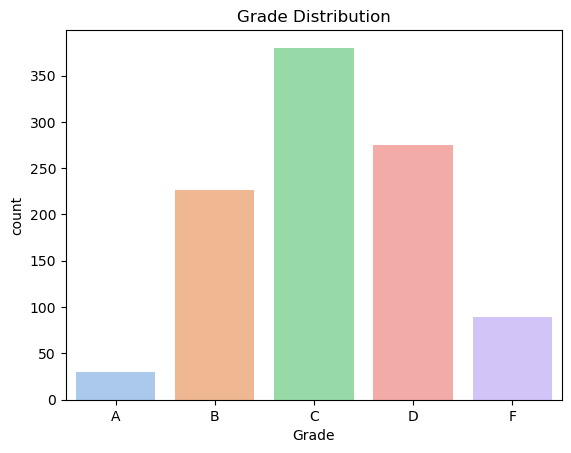

In [4]:
# 학점 분포
sns.countplot(x="Grade", data=df, palette="pastel", order=['A','B','C','D','F'])
plt.title("Grade Distribution")
plt.show()

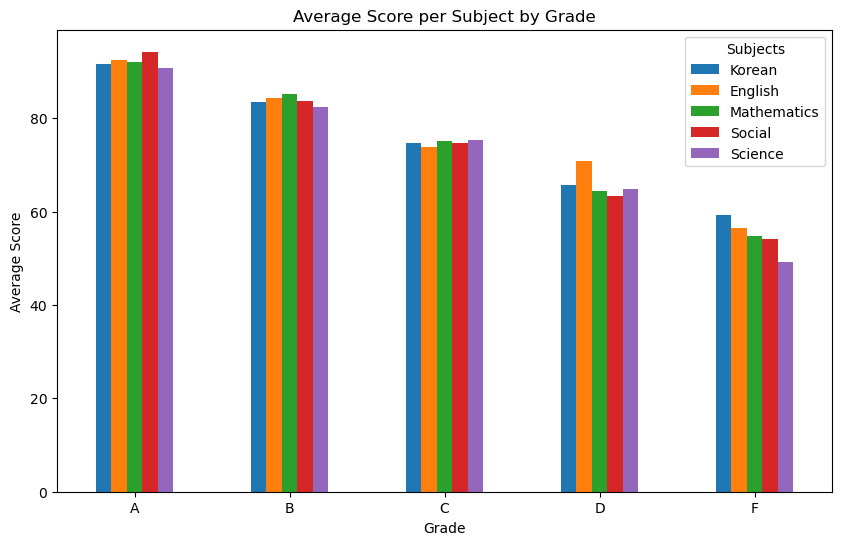

In [5]:
# 학점별 과목 평균 비교
grade_means = df.groupby("Grade")[["Korean","English","Mathematics","Social","Science"]].mean()
grade_means = grade_means.reindex(['A','B','C','D','F'])  # 순서 맞추기

grade_means.plot(kind='bar', figsize=(10,6), rot=0)
plt.title("Average Score per Subject by Grade")
plt.ylabel("Average Score")
plt.xlabel("Grade")
plt.legend(title="Subjects")
plt.show()


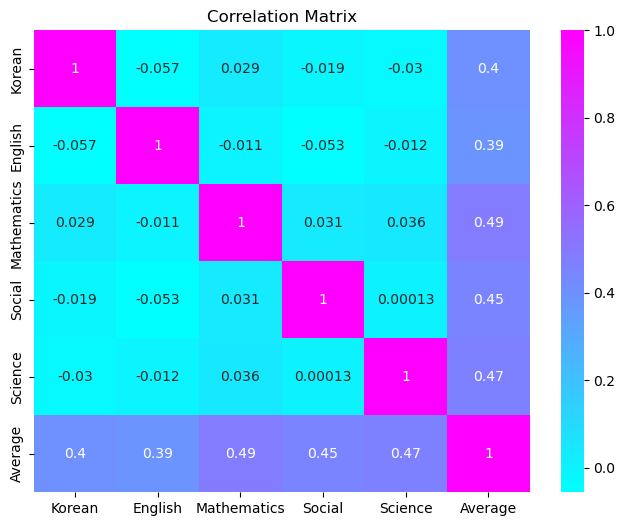

In [6]:
#상관관계 히트맵
plt.figure(figsize=(8,6))
sns.heatmap(df[["Korean","English","Mathematics","Social","Science","Average"]].corr(), annot=True, cmap="cool")
plt.title("Correlation Matrix")
plt.show()

In [7]:
# 데이터 전처리
X = df[["Korean","English","Mathematics","Social","Science"]].values
y = df["Grade"].values

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [8]:
# 딥러닝 모델 구성
model = Sequential([
    Dense(64, input_dim=5, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.3)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1571 - loss: 19.0415 - val_accuracy: 0.2417 - val_loss: 9.0432
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2661 - loss: 8.2471 - val_accuracy: 0.3208 - val_loss: 6.2825
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3286 - loss: 6.4871 - val_accuracy: 0.3750 - val_loss: 4.5930
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3393 - loss: 5.0385 - val_accuracy: 0.3292 - val_loss: 3.7736
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3500 - loss: 3.4397 - val_accuracy: 0.2833 - val_loss: 2.7943
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3661 - loss: 2.5789 - val_accuracy: 0.2958 - val_loss: 2.4048
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3911 - loss: 2.1335 - val_accuracy: 0.3250 - val_loss: 2.1736
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3964 - loss: 1.8613 - val_accuracy: 0.3292 - val_loss: 1.9239
Epoch 

In [10]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

In [11]:
# 정확도
axes[0].plot(history.history['accuracy'], label='Train Acc')
axes[0].plot(history.history['val_accuracy'], label='Val Acc')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

In [12]:
# 손실
axes[1].plot(history.history['loss'], label='Train Loss')
axes[1].plot(history.history['val_loss'], label='Val Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()


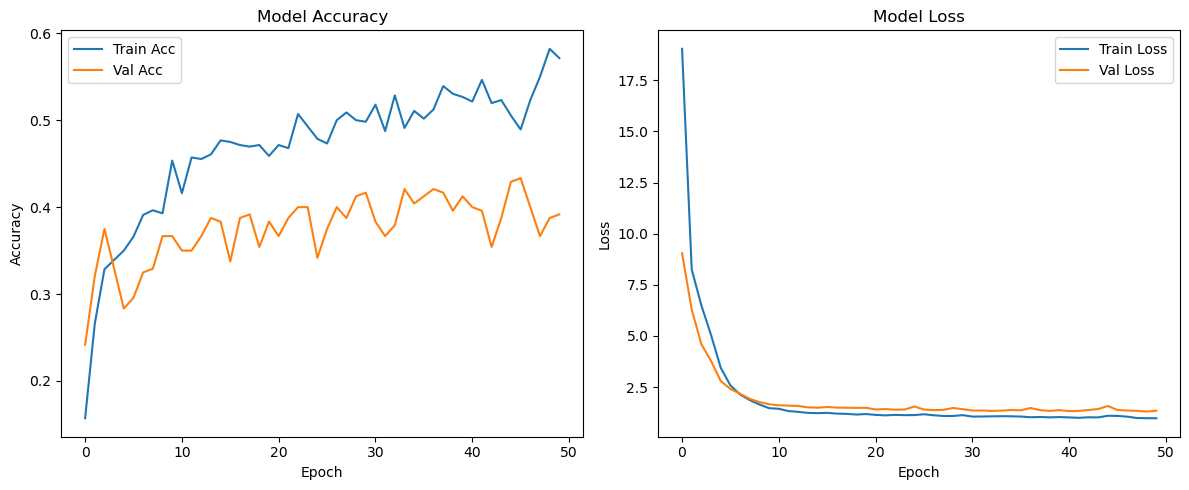

In [13]:
plt.tight_layout()
plt.show()

In [14]:
# 테스트셋 평가
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4350 - loss: 1.2485 
Test Accuracy: 0.4350


In [15]:
# 학점별 혼동행렬
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)
all_labels = le.classes_  # ['A','B','C','D','F']


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


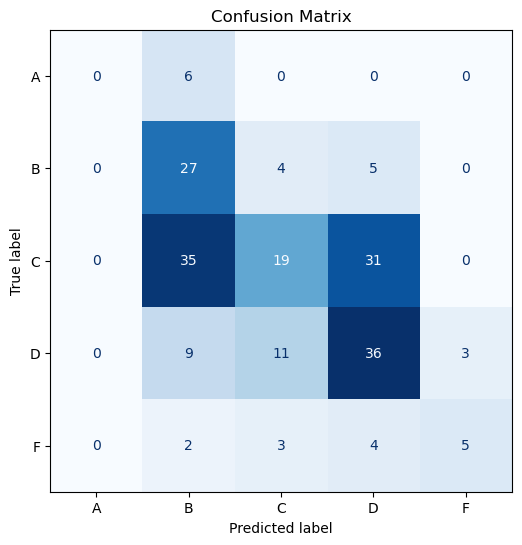

In [16]:
cm = confusion_matrix(y_true, y_pred, labels=range(len(all_labels)))
fig, ax = plt.subplots(figsize=(8,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix")
plt.show()